In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

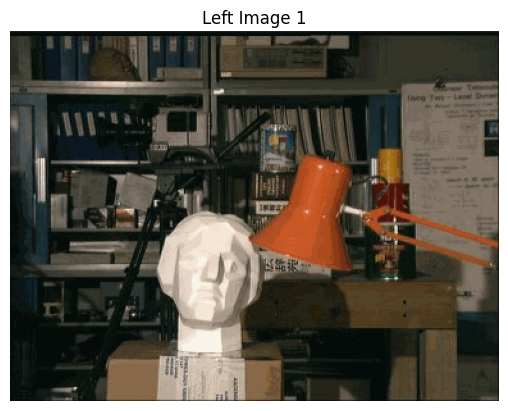

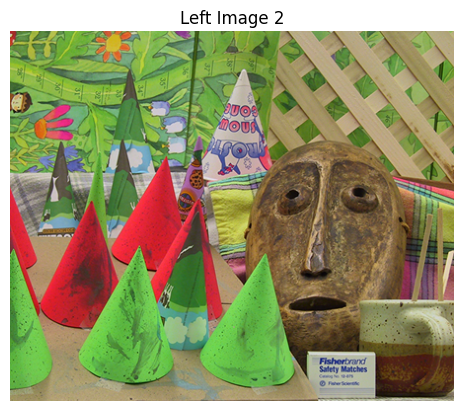

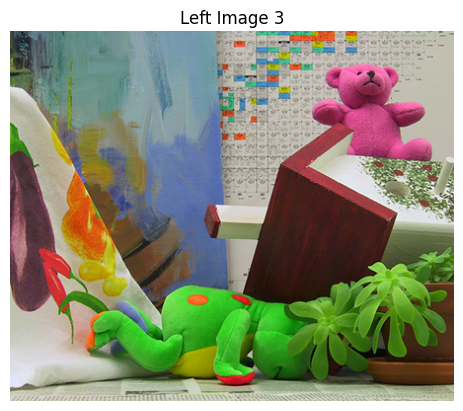

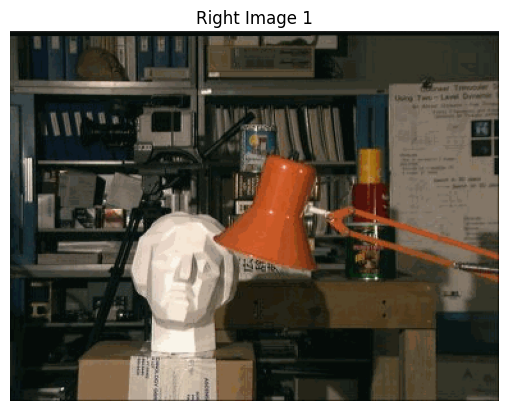

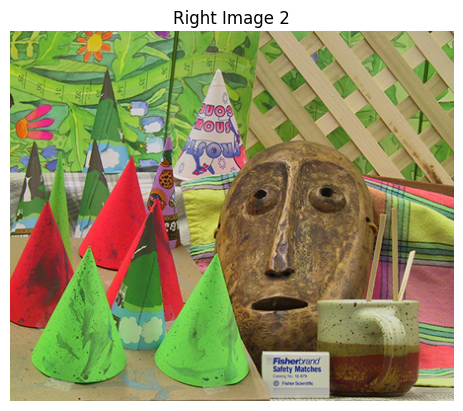

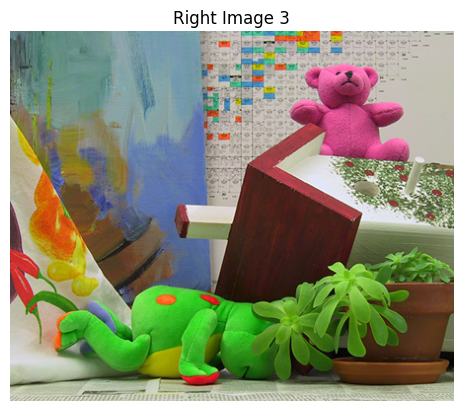

In [5]:
image_path1 = os.path.join("..", "stereo_materials", "l1.png")
image_path2 = os.path.join("..", "stereo_materials", "l2.png")
image_path3 = os.path.join("..", "stereo_materials", "l3.png")
image_path4 = os.path.join("..", "stereo_materials", "r1.png")
image_path5 = os.path.join("..", "stereo_materials", "r2.png")
image_path6 = os.path.join("..", "stereo_materials", "r3.png")
left1 = cv2.imread(image_path1)
left2 = cv2.imread(image_path2)
left3 = cv2.imread(image_path3)
right1 = cv2.imread(image_path4)
right2 = cv2.imread(image_path5)
right3 = cv2.imread(image_path6)

def show_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(left1, "Left Image 1")
show_image(left2, "Left Image 2")
show_image(left3, "Left Image 3")
show_image(right1, "Right Image 1") 
show_image(right2, "Right Image 2")
show_image(right3, "Right Image 3")

In [6]:
def convert_to_grayscale(image):
    """Convert a given image to grayscale."""
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
left1_grayscale = convert_to_grayscale(left1)
left2_grayscale = convert_to_grayscale(left2)
left3_grayscale = convert_to_grayscale(left3)
right1_grayscale = convert_to_grayscale(right1)
right2_grayscale = convert_to_grayscale(right2)
right3_grayscale = convert_to_grayscale(right3)

In [8]:
def block_matching_SAD(left_image,right_image,max_disparity,window_size):
    left_height, left_width=left_image.shape
    disparity_map=np.zeros((left_height,left_width),dtype=np.uint8) # create a blanck disparity map
    half_width=window_size//2 # so we can use centered windows

    # iterative over pixels ( to be within the bounds)
    
    for y in range(half_width, left_height - half_width):
        for x in range(half_width, left_width - half_width):
            best_offset = 0
            min_cost = float('inf')

            left_patch = left_image[y - half_width:y + half_width + 1, x - half_width:x + half_width + 1]

            # test different disparity values and skip if it goes out of bound
            for d in range(0, max_disparity):
                x_right = x - d
                if x_right - half_width < 0:
                    continue

                right_patch = right_image[y - half_width:y + half_width + 1, x_right - half_width:x_right + half_width + 1]
                cost = np.sum(np.abs(left_patch - right_patch))  # SAD cost

                # finding the best match
                if cost < min_cost:
                    min_cost = cost
                    best_offset = d

            # convert teh diparity to grayscale value for visual
            disparity_map[y, x] = int(best_offset * (255 / max_disparity))

    return disparity_map

In [9]:
def block_matching_SSD(left_image, right_image, max_disparity, window_size):
    left_height, left_width = left_image.shape
    disparity_map = np.zeros((left_height, left_width), dtype=np.uint8)
    half_width = window_size // 2

    for y in range(half_width, left_height - half_width):
        for x in range(half_width, left_width - half_width):
            best_offset = 0
            min_cost = float('inf')
            left_patch = left_image[y - half_width:y + half_width + 1, x - half_width:x + half_width + 1]

            for d in range(0, max_disparity):
                x_right = x - d
                if x_right - half_width < 0:
                    continue

                right_patch = right_image[y - half_width:y + half_width + 1, x_right - half_width:x_right + half_width + 1]
                cost = np.sum((left_patch - right_patch) ** 2)  # SSD cost

                if cost < min_cost:
                    min_cost = cost
                    best_offset = d

            disparity_map[y, x] = int(best_offset * (255 / max_disparity))

    return disparity_map


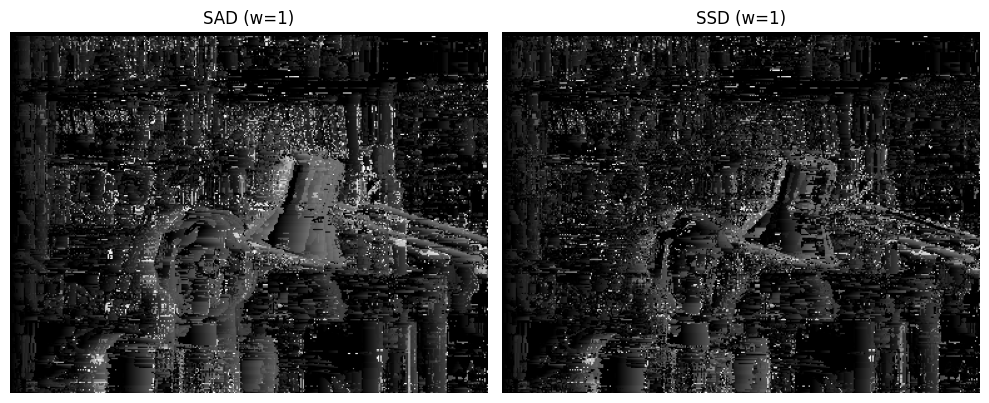

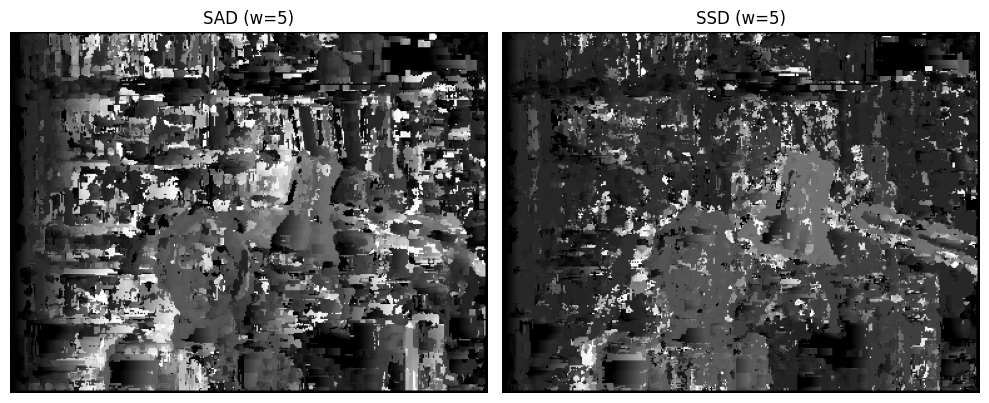

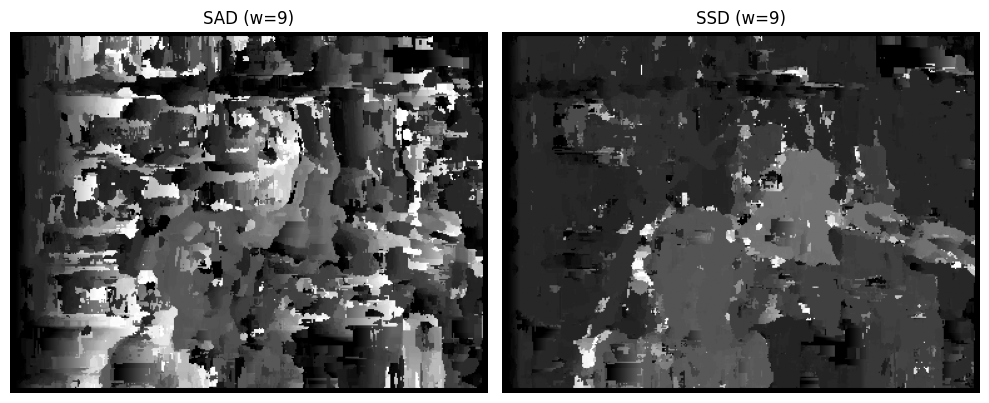

In [10]:
# Disparity settings
max_disparity = 64
window_sizes = [1, 5, 9]

for w in window_sizes:
    disp_sad = block_matching_SAD(left1_grayscale, right1_grayscale, max_disparity, w)
    disp_ssd = block_matching_SSD(left1_grayscale, right1_grayscale, max_disparity, w)

    # Show the results
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    plt.title(f'SAD (w={w})')
    plt.imshow(disp_sad, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'SSD (w={w})')
    plt.imshow(disp_ssd, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


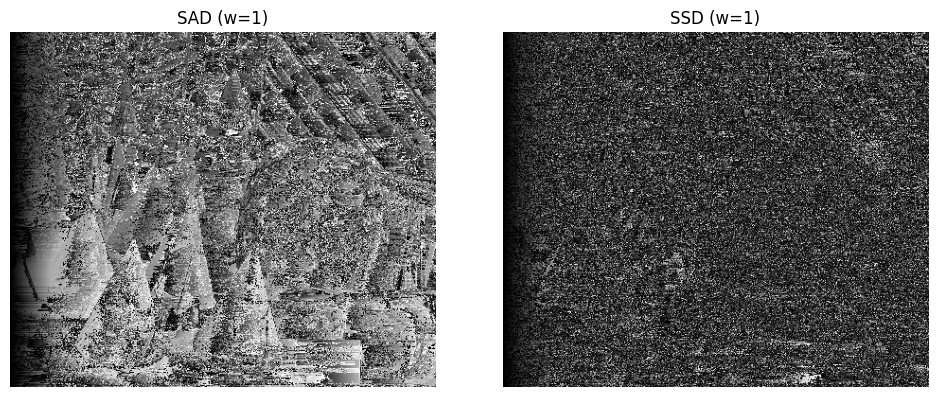

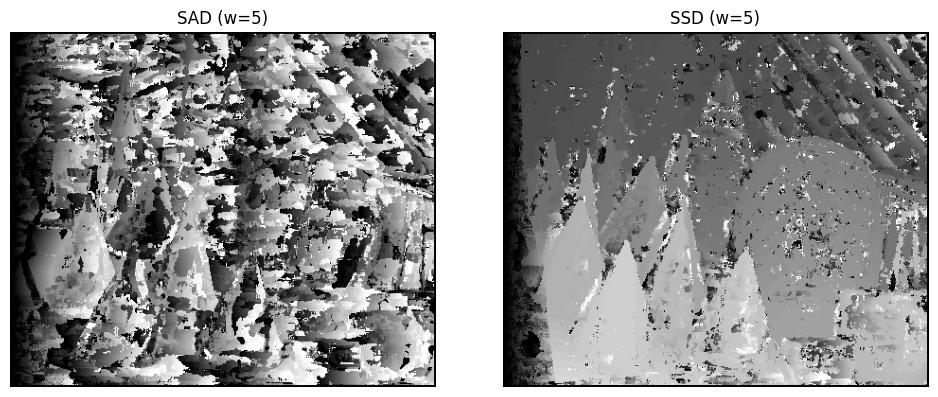

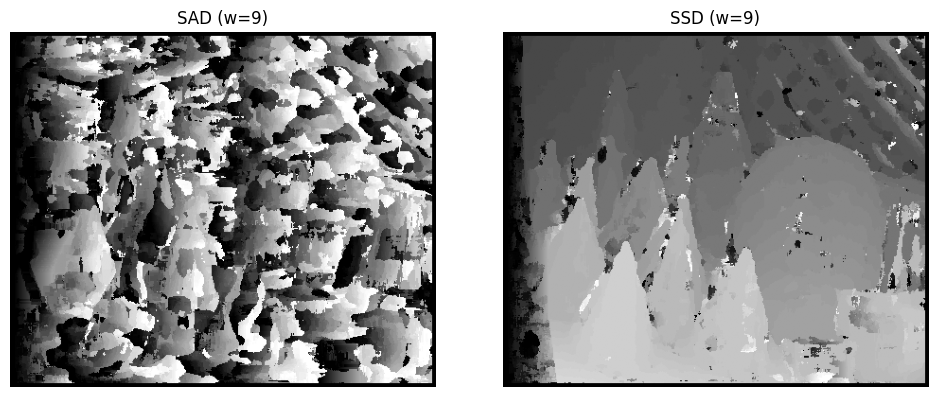

In [11]:
# Disparity settings
max_disparity = 64
window_sizes = [1, 5, 9]

for w in window_sizes:
    disp_sad = block_matching_SAD(left2_grayscale, right2_grayscale, max_disparity, w)
    disp_ssd = block_matching_SSD(left2_grayscale, right2_grayscale, max_disparity, w)

    # Show the results
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    plt.title(f'SAD (w={w})')
    plt.imshow(disp_sad, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'SSD (w={w})')
    plt.imshow(disp_ssd, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


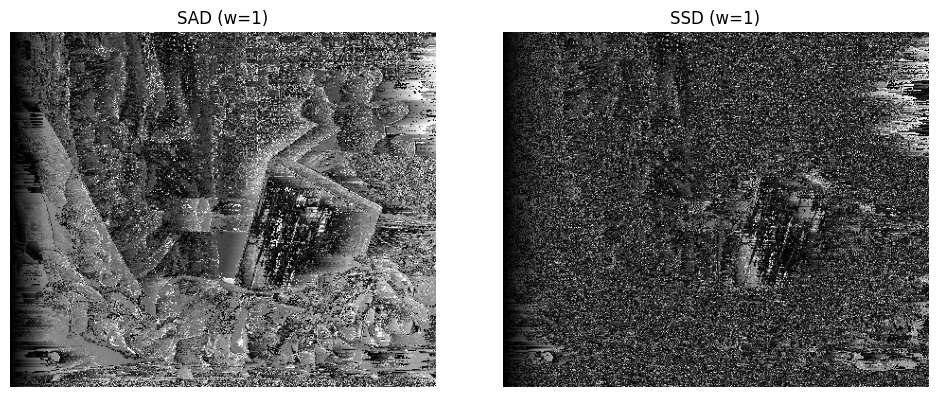

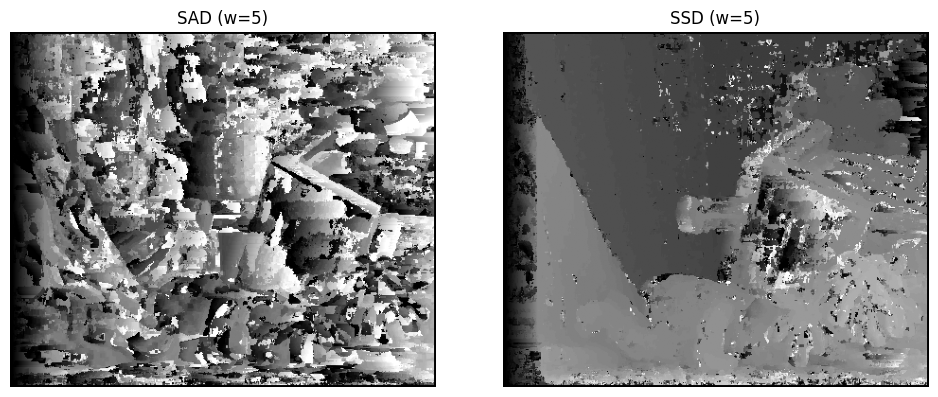

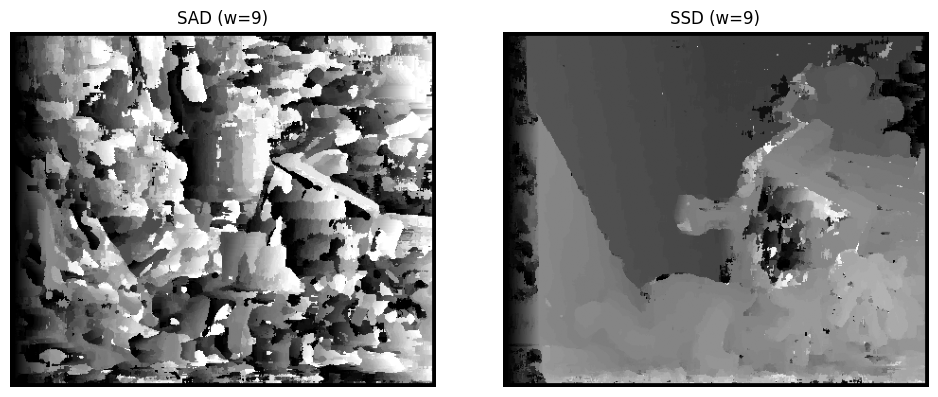

In [12]:
# Disparity settings
max_disparity = 64
window_sizes = [1, 5, 9]

for w in window_sizes:
    disp_sad = block_matching_SAD(left3_grayscale, right3_grayscale, max_disparity, w)
    disp_ssd = block_matching_SSD(left3_grayscale, right3_grayscale, max_disparity, w)

    # Show the results
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    plt.title(f'SAD (w={w})')
    plt.imshow(disp_sad, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'SSD (w={w})')
    plt.imshow(disp_ssd, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


## Part 1.1.2

In [13]:
def dp_scanline(Il, Ir, sigma=2, c0=1):
    n = len(Il)
    
    # Create and compute squared difference cost matrix

    d = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            diff = int(Il[i]) - int(Ir[j])
            d[i, j] = (diff * diff) / (sigma ** 2)


    # Create Cost Matrix D
    D = np.zeros((n + 1, n + 1))
    D[0, 0] = 0

    # Set initial state for first row and column
    for i in range(1, n + 1):
        D[i, 0] = D[i - 1, 0] + c0
    for j in range(1, n + 1):
        D[0, j] = D[0, j - 1] + c0

    # Compute matrix D using the relation D(i, j) = min(D(i − 1, j − 1) + dij ,D(i − 1, j) + c0,D(i, j − 1) + c0)
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            term1 = D[i - 1, j - 1] + d[i - 1, j - 1] # cost match term
            term2 = D[i - 1, j] + c0 # cost left skipped term
            term3 = D[i, j - 1] + c0 # cost right skipped term
            D[i, j] = min(term1, term2, term3)


    i, j = n, n
    leftDisparity = np.zeros(n, dtype=np.int32)
    rightDisparity = np.zeros(n, dtype=np.int32)

    while i > 0 and j > 0:
        currentCost = D[i, j]

        matchedCost = D[i - 1, j - 1] + d[i - 1, j - 1]
        skipLeftCost = D[i - 1, j] + c0

        if currentCost == matchedCost:

            disparity = abs(i - j)

            leftDisparity[i - 1] = disparity
            rightDisparity[j - 1] = disparity

            i -= 1
            j -= 1
        elif currentCost == skipLeftCost:
            # Occlusion in left image
             
            leftDisparity[i - 1] = 0
            i -= 1
        else:
            # Occlusion in right image
            
            rightDisparity[j - 1] = 0
            j -= 1

    # Process occlusions
    while i > 0:
        leftDisparity[i - 1] = 0
        i -= 1
    while j > 0:
        rightDisparity[j - 1] = 0
        j -= 1

    return leftDisparity, rightDisparity


def get_disparity_map_dp(left_img, right_img, sigma=2, c0=1):
    height, _ = left_img.shape
    leftDisparityMap = np.zeros_like(left_img, dtype=np.uint8)
    rightDisparityMap = np.zeros_like(right_img, dtype=np.uint8)

    for row in range(height):
        leftDisparityRow, rightDisparityRow = dp_scanline(left_img[row], right_img[row], sigma, c0)
        leftDisparityMap[row] = leftDisparityRow
        rightDisparityMap[row] = rightDisparityRow

    return leftDisparityMap, rightDisparityMap


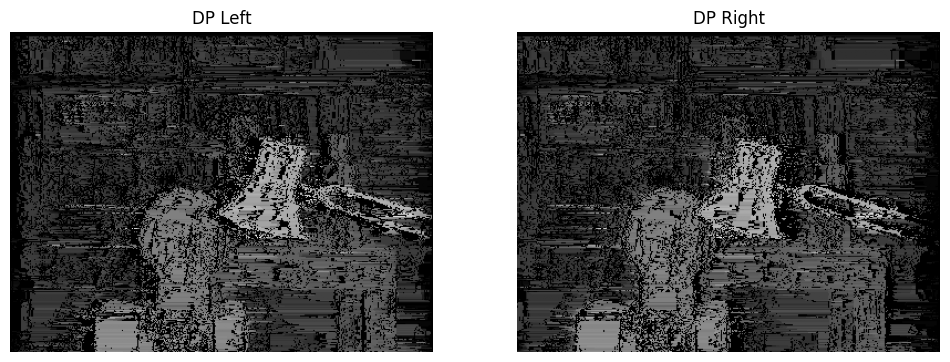

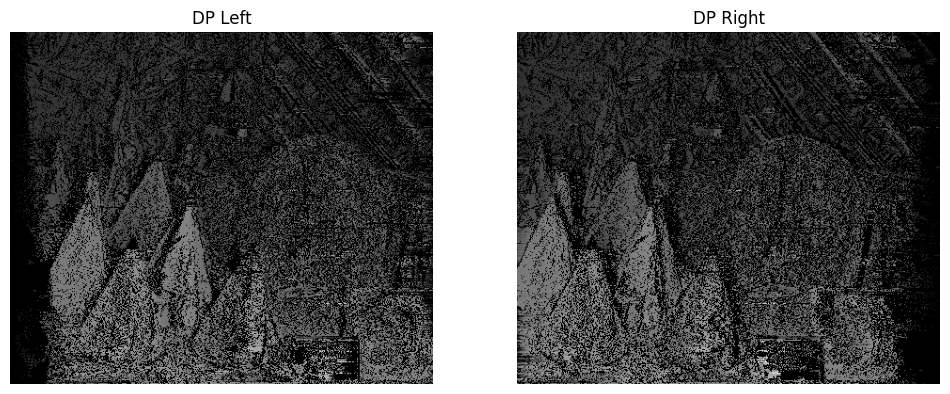

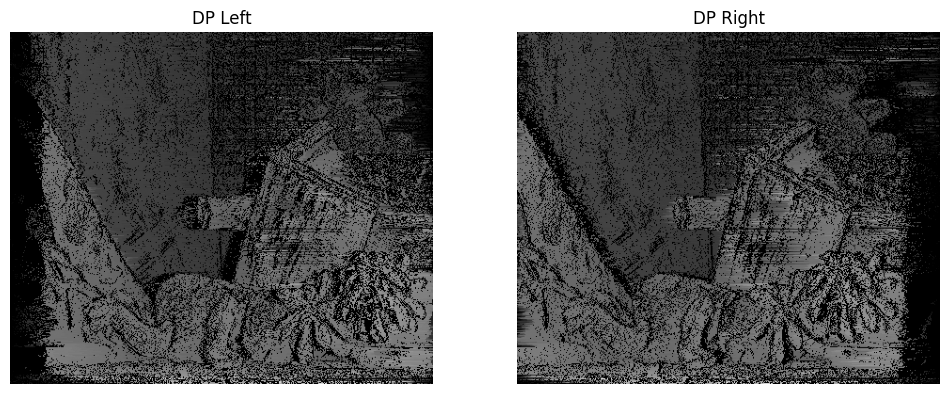

In [14]:
disp_maps = []

for left_img, right_img in [(left1_grayscale, right1_grayscale), (left2_grayscale, right2_grayscale), (left3_grayscale, right3_grayscale)]:

    disp_left, disp_right = get_disparity_map_dp(left_img, right_img)
    disp_maps.append(disp_left)
    disp_maps.append(disp_right)

    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.title("DP Left")
    plt.imshow(disp_left, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("DP Right")
    plt.imshow(disp_right, cmap='gray')
    plt.axis('off')
    plt.show()

In [15]:
# adding smoothing
# for i in range(0, len(disp_maps), 2):
#     smoothed_left = cv2.medianBlur(disp_maps[i], 5)
#     smoothed_right = cv2.medianBlur(disp_maps[i+1], 5)

#     plt.figure(figsize=(12,5))
#     plt.subplot(1, 2, 1)
#     plt.title("DP Left")
#     plt.imshow(smoothed_left, cmap='gray')
#     plt.axis('off')

#     plt.subplot(1, 2, 2)
#     plt.title("DP Right")
#     plt.imshow(smoothed_right, cmap='gray')
#     plt.axis('off')
#     plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_alignment(Il, Ir, sigma=2, c0=1):
    n = len(Il)

    d = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            diff = int(Il[i]) - int(Ir[j])
            d[i, j] = (diff * diff) / (sigma ** 2)

    D = np.zeros((n + 1, n + 1))
    D[0, 0] = 0
    for i in range(1, n + 1):
        D[i, 0] = D[i - 1, 0] + c0
    for j in range(1, n + 1):
        D[0, j] = D[0, j - 1] + c0
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            term1 = D[i - 1, j - 1] + d[i - 1, j - 1]
            term2 = D[i - 1, j] + c0
            term3 = D[i, j - 1] + c0
            D[i, j] = min(term1, term2, term3)

    # Now plot the path
    i, j = n, n

    plt.figure(figsize=(8, 8))
    plt.xlabel("Ir pixels")
    plt.ylabel("Il pixels")

    plt.xlim(0, n)
    plt.ylim(0, n)

    while i > 0 and j > 0:
        currentCost = D[i, j]
        matchedCost = D[i - 1, j - 1] + d[i - 1, j - 1]
        skipLeftCost = D[i - 1, j] + c0

        if currentCost == matchedCost:
            # match -> diagonal
            plt.plot([j, j-1], [i, i-1], 'k') 
            i -= 1
            j -= 1
        elif currentCost == skipLeftCost:
            # skip in left image -> vertical move
            plt.plot([j, j], [i, i-1], 'r')
            i -= 1
        else:
            # skip in right image -> horizontal move
            plt.plot([j, j-1], [i, i], 'b') 
            j -= 1

    while i > 0:
        plt.plot([j, j], [i, i-1], 'r')
        i -= 1
    while j > 0:
        plt.plot([j, j-1], [i, i], 'b')
        j -= 1

    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()


In [ ]:
left_img.shape

(375, 450)

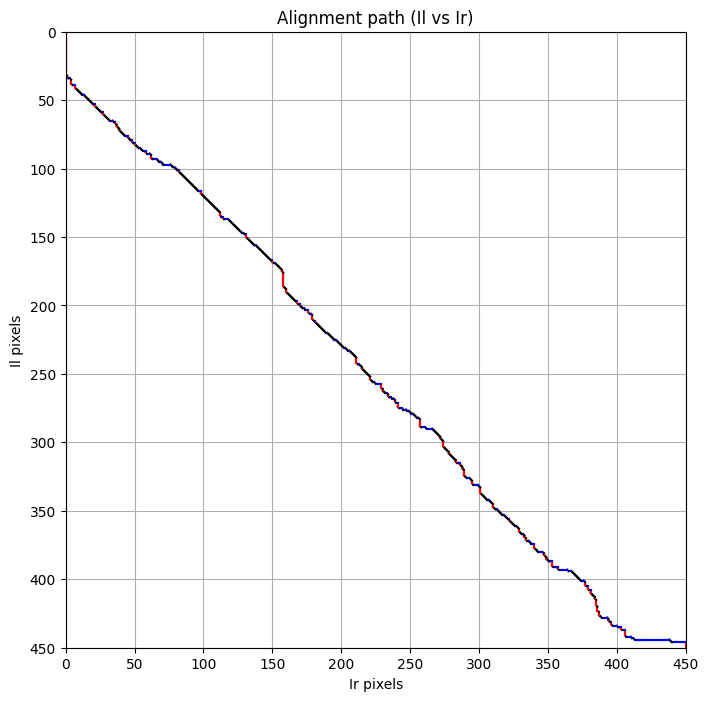

In [19]:
row = 188

Il = left_img[row]
Ir = right_img[row]
plot_alignment(Il, Ir)
